In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
ga_path = r'C:\Users\huda\Downloads\ga_worker_results\ga_worker_results_rewritten'
file_paths = [r'C:\Users\huda\Downloads\results_ortools.txt', r'C:\Users\huda\Downloads\results_cplex_cp.txt', r'C:\Users\huda\Downloads\results_gurobi.txt', r'C:\Users\huda\Downloads\results_hexaly_rewritten.txt', r'C:\Users\huda\Downloads\results_cplex_lp_rewritten.txt']
optimizers = ['ORTOOLS', 'CPLEX-CP', 'GUROBI', 'HEXALY', 'CPLEX-LP']

In [3]:
def read_file(file : str) -> pd.DataFrame:
    file_content = pd.read_csv(file, names=['name','optimization_status','fitness_value','lower_bound', 'runtime', 'result_vector1', 'result_vector2', 'result_vector3', 'peak_cpu', 'peak_ram', 'resource_history', 'best_result_history'], sep=';')#, converters={'best_result_history': pd.eval})
    # NOTE: fill optimization status for GA versions with 0
    #file_content = pd.read_csv(file, names=['name','optimization_status','fitness_value', 'runtime', 'resource_history', 'best_result_history'], sep=';')
    df = pd.DataFrame(file_content)
    del file_content
    df = df.drop(columns=['result_vector1', 'result_vector2', 'result_vector3', 'peak_cpu', 'peak_ram'])
    df = df[~df['name'].str.startswith('Error')]
    df = df[df['fitness_value'] != float('inf')]
    return df

In [4]:
def remap(name):
    if name.startswith('_'):
        name = name[1:]
    values = name.split('_')
    if values[0].startswith('Behnke'):
        return 'Behnke'+values[-1]
    if values[0].startswith('Brandimarte'):
        return 'BrandimarteMk'+values[-1]
    if values[0].startswith('Chambers'):
        return 'ChambersBarnes'+values[-1]
    if values[0].startswith('Hurink') and values[1].startswith('s'):
        return 'HurinkSdata'+values[-1]
    if values[0].startswith('Hurink') and values[1].startswith('e'):
        return 'HurinkEdata'+values[-1]
    if values[0].startswith('Hurink') and values[1].startswith('r'):
        return 'HurinkRdata'+values[-1]
    if values[0].startswith('Hurink') and values[1].startswith('v'):
        return 'HurinkVdata'+values[-1]
    if values[0].startswith('DP'):
        return 'DPpaulli'+values[-1]
    if values[0].startswith('Kacem'):
        return 'Kacem'+values[-1]
    if values[0].startswith('Fattahi'):
        return 'Fattahi'+values[-1]
    return name

In [5]:
def extract_solver_data(fjssp_w):
    compare = dict()
    for index, row in fjssp_w.iterrows():
        name = remap(row['name'][2:-12])
        if name not in compare:
            compare[name] = {
                'fitness': row['fitness_value'],
                'lower_bound': row['lower_bound'],
                'status': row['optimization_status'],
                'runtime': row['runtime']
            }
    return compare

In [6]:
cp_fjssp_w = read_file(file_paths[1])
cplp_fjssp_w = read_file(file_paths[4])
gurobi_fjssp_w = read_file(file_paths[2])
ortools_fjssp_w = read_file(file_paths[3])
solver = dict()
solver['cplex_cp'] = extract_solver_data(cp_fjssp_w)
solver['cplex_lp'] = extract_solver_data(cplp_fjssp_w)
solver['gurobi'] = extract_solver_data(gurobi_fjssp_w)
solver['ortools'] = extract_solver_data(ortools_fjssp_w)

In [7]:
ga_fjssp_w_data = dict()
files = os.listdir(ga_path)
for file in files:
    with open(ga_path + '/' + file, 'r') as f:
        json_data = json.loads(f.read())
        ga_fjssp_w_data[remap(file[2:-17])] = json_data

In [8]:
ga_average_fjssp = dict()
ga_average_fjssp_w = dict()
ga_best_fjssp = dict()
ga_best_fjssp_w = dict()
for instance in ga_fjssp_w_data:
    ga_best_fjssp_w[instance] = float('inf')
    ga_average_fjssp_w[instance] = 0
    for run in ga_fjssp_w_data[instance]['results']:
        fitness = run['Result']['Fitness']['Makespan']
        if fitness < ga_best_fjssp_w[instance]:
            ga_best_fjssp_w[instance] = fitness
        ga_average_fjssp_w[instance] += fitness
    ga_average_fjssp_w[instance] /= len( ga_fjssp_w_data[instance]['results'])
    

In [9]:
compare = dict()
for instance in ga_average_fjssp_w:
    compare[instance] = {
        'fitness': ga_average_fjssp_w[instance],
        #'runtime': row['runtime'] # TODO: maybe?
    }
solver['ga_average'] = compare
compare = dict()
for instance in ga_best_fjssp_w:
    compare[instance] = {
        'fitness': ga_best_fjssp_w[instance],
        #'runtime': row['runtime'] # TODO: maybe?
    }
solver['ga_best'] = compare

In [10]:
solver['ga_best'].keys()

dict_keys(['Behnke10', 'Behnke11', 'Behnke12', 'Behnke13', 'Behnke14', 'Behnke15', 'Behnke16', 'Behnke17', 'Behnke18', 'Behnke19', 'Behnke1', 'Behnke20', 'Behnke21', 'Behnke22', 'Behnke23', 'Behnke24', 'Behnke25', 'Behnke26', 'Behnke27', 'Behnke28', 'Behnke29', 'Behnke2', 'Behnke30', 'Behnke31', 'Behnke32', 'Behnke33', 'Behnke34', 'Behnke35', 'Behnke36', 'Behnke37', 'Behnke38', 'Behnke39', 'Behnke3', 'Behnke40', 'Behnke41', 'Behnke42', 'Behnke43', 'Behnke44', 'Behnke45', 'Behnke46', 'Behnke47', 'Behnke48', 'Behnke49', 'Behnke4', 'Behnke50', 'Behnke51', 'Behnke52', 'Behnke53', 'Behnke54', 'Behnke55', 'Behnke56', 'Behnke57', 'Behnke58', 'Behnke59', 'Behnke5', 'Behnke60', 'Behnke6', 'Behnke7', 'Behnke8', 'Behnke9', 'BrandimarteMk10', 'BrandimarteMk11', 'BrandimarteMk12', 'BrandimarteMk13', 'BrandimarteMk14', 'BrandimarteMk15', 'BrandimarteMk1', 'BrandimarteMk2', 'BrandimarteMk3', 'BrandimarteMk4', 'BrandimarteMk5', 'BrandimarteMk6', 'BrandimarteMk7', 'BrandimarteMk8', 'BrandimarteMk9', 'H

In [11]:
solver['cplex_cp'].keys()

dict_keys(['Behnke10', 'Behnke11', 'Behnke12', 'Behnke13', 'Behnke14', 'Behnke15', 'Behnke16', 'Behnke17', 'Behnke18', 'Behnke19', 'Behnke1', 'Behnke20', 'Behnke21', 'Behnke22', 'Behnke23', 'Behnke24', 'Behnke25', 'Behnke26', 'Behnke27', 'Behnke28', 'Behnke29', 'Behnke2', 'Behnke30', 'Behnke31', 'Behnke32', 'Behnke33', 'Behnke34', 'Behnke35', 'Behnke36', 'Behnke37', 'Behnke38', 'Behnke39', 'Behnke3', 'Behnke40', 'Behnke41', 'Behnke42', 'Behnke43', 'Behnke44', 'Behnke45', 'Behnke46', 'Behnke47', 'Behnke48', 'Behnke49', 'Behnke4', 'Behnke50', 'Behnke51', 'Behnke52', 'Behnke53', 'Behnke54', 'Behnke55', 'Behnke56', 'Behnke57', 'Behnke58', 'Behnke59', 'Behnke5', 'Behnke60', 'Behnke6', 'Behnke7', 'Behnke8', 'Behnke9', 'BrandimarteMk11', 'BrandimarteMk12', 'BrandimarteMk13', 'BrandimarteMk14', 'BrandimarteMk15', 'BrandimarteMk1', 'BrandimarteMk2', 'BrandimarteMk3', 'BrandimarteMk4', 'BrandimarteMk5', 'BrandimarteMk6', 'BrandimarteMk7', 'BrandimarteMk9', 'HurinkSdata10', 'HurinkSdata11', 'Huri

In [12]:
best = dict()
for instance in solver['ga_best']:
    best[instance] = float('inf')
    for s in solver:
        if instance in solver[s]:
            if solver[s][instance]['fitness'] < best[instance]:
                best[instance] = solver[s][instance]['fitness']


In [13]:
def calculate_gap(fitness, best):
    return ((fitness - best) / best)

In [14]:
def get_in_gap(max_gap):
    solver_gap = dict()
    for instance in solver['ga_best']:
        for s in solver:
            if instance in solver[s]:
                gap = calculate_gap(solver[s][instance]['fitness'], best[instance])
                if gap <= max_gap:
                    if s not in solver_gap:
                        solver_gap[s] = []
                    solver_gap[s].append(instance)
    return solver_gap

In [15]:
def show_in_gap(max_gap):
    solver_gap = get_in_gap(max_gap)
    print(max_gap)
    for s in solver_gap:
        print(f'{s}: {len(solver_gap[s])}')


In [16]:
show_in_gap(0)
show_in_gap(0.05)
show_in_gap(0.1)
show_in_gap(0.2)
show_in_gap(0.3)

0
cplex_cp: 346
ga_best: 30
ortools: 58
ga_average: 9
gurobi: 20
cplex_lp: 9
0.05
cplex_cp: 398
gurobi: 99
ortools: 215
ga_best: 164
ga_average: 113
cplex_lp: 27
0.1
cplex_cp: 400
ga_best: 214
gurobi: 158
ortools: 268
ga_average: 182
cplex_lp: 36
0.2
cplex_cp: 400
ga_average: 275
ga_best: 304
gurobi: 220
ortools: 317
cplex_lp: 63
0.3
cplex_cp: 400
ortools: 353
ga_average: 329
ga_best: 335
gurobi: 244
cplex_lp: 104


In [17]:
optimal_instances = []
for instance in solver['ga_best']:
    for s in solver:
        if s == 'cplex_cp' or s == 'ortools':
            if instance in solver[s]:
                if solver[s][instance]['status'] == 1:
                    optimal_instances.append(instance)

In [18]:
len(optimal_instances)

84

In [19]:
84/402

0.208955223880597

In [20]:
instances_ga_win = []
instances_ga_tie = []
instances_cp_win = []
for instance in solver['ga_best']:
    if instance in solver['cplex_cp']:
        if solver['cplex_cp'][instance]['fitness'] < solver['ga_best'][instance]['fitness']:
            instances_cp_win.append(instance)
        elif solver['cplex_cp'][instance]['fitness'] == solver['ga_best'][instance]['fitness']:
            instances_ga_tie.append(instance)
        else: 
            instances_ga_win.append(instance)
    else:
        instances_ga_win.append(instance)

In [21]:
len(instances_ga_win)

13

In [22]:
from benchmarkrewriter.benchmark_parser import BenchmarkParser, WorkerBenchmarkParser, WorkerEncoding
def worker_flexibility(benchmark : WorkerEncoding):
    n_assignments = 0
    m = benchmark.n_machines()
    o = benchmark.n_operations()
    durations = benchmark.durations()
    w = durations.shape[2]
    combs = dict()
    for i in range(len(durations)):
        for j in range(len(durations[i])):
            for k in range(len(durations[i][j])):
                if durations[i][j][k] > 0:
                    n_assignments += 1
                combs[(j,k)] = 1
    average_assignments = n_assignments / o
    #return average_assignments / (m*w)
    return average_assignments / len(combs)

def get_flexibility_and_dv_worker(benchmark):
    all = 0
    unique = []
    machines_available = 0
    durations = benchmark.durations()
    for i in range(len(durations)):
        for j in range(len(durations[i])):
            for k in range(len(durations[i][j])):
                if durations[i][j][k] > 0:
                    if durations[i][j][k] not in unique:
                        unique.append(durations[i][j][k])
                    all += 1
            if any([x > 0 for x in durations[i][j]]):
                machines_available+=1
    #return (machines_available / len(durations)) / benchmark.n_machines(), len(unique) / all
    return worker_flexibility(benchmark), len(unique) / all

def get_max(durations):
    max = 0
    for operation in durations:
        for machine in operation:
            for worker in machine:
                if worker > max:
                    max = worker
    return max

def read_benchmarks_workers(path):
    result = dict()
    benchmarks = os.listdir(path)
    for benchmark in benchmarks:
        #parser = BenchmarkParser()
        parser = WorkerBenchmarkParser()
        data = parser.parse_benchmark(path + '/' + benchmark)
        #f, dv = get_flexibility_and_dv(data)
        f, dv = get_flexibility_and_dv_worker(data)
        instance_name = remap(benchmark[2:-12])
        metrics = dict()

        max_duration = get_max(data.durations())
        counts = [0] * (max_duration+1)
        for operation in data.durations():
            for machine in operation:
                for worker in machine:
                    if worker > 0:
                        counts[worker] += 1
        d_distinct = [x for x in range(len(counts)) if counts[x] > 0]
        d_unique = [x for x in range(len(counts)) if counts[x] == 1]
        d_shared = [x for x in range(len(counts)) if counts[x] > 1]
        metrics['d_distinct'] = d_distinct
        metrics['d_unique'] = d_unique
        metrics['d_shared'] = d_shared
        metrics['d_average'] = sum(counts)/data.n_operations()
        result[instance_name] = {'n_operations': data.n_operations(), 'flexibility': f, 'duration_variety': dv, 'n_machines': data.n_machines(), 'n_workers': data.n_workers(), 'n_assignments': sum(counts), 'additional_metrics': metrics}

    return result

In [23]:
benchmark_path = r'C:\Users\huda\Documents\GitHub\scheduling_model_jrc\code\upgrades\benchmarks_with_workers'
benchmark_data = read_benchmarks_workers(benchmark_path)

In [24]:
ga_attributes = {'f': [], 'o': [], 'm': [], 'dv': []}
cp_attributes = {'f': [], 'o': [], 'm': [], 'dv': []}
tied_attributes = {'f': [], 'o': [], 'm': [], 'dv': []}

for instance in instances_ga_win:
    ga_attributes['f'].append(benchmark_data[instance]['flexibility'])
    ga_attributes['o'].append(benchmark_data[instance]['n_operations'])
    ga_attributes['m'].append(benchmark_data[instance]['additional_metrics']['d_average'])
    ga_attributes['dv'].append(benchmark_data[instance]['duration_variety'])
for instance in instances_ga_tie:
    tied_attributes['f'].append(benchmark_data[instance]['flexibility'])
    tied_attributes['o'].append(benchmark_data[instance]['n_operations'])
    tied_attributes['m'].append(benchmark_data[instance]['additional_metrics']['d_average'])
    tied_attributes['dv'].append(benchmark_data[instance]['duration_variety'])
for instance in instances_cp_win:
    cp_attributes['f'].append(benchmark_data[instance]['flexibility'])
    cp_attributes['o'].append(benchmark_data[instance]['n_operations'])
    cp_attributes['m'].append(benchmark_data[instance]['additional_metrics']['d_average'])
    cp_attributes['dv'].append(benchmark_data[instance]['duration_variety'])

In [25]:
import statistics
def print_data(data):
    o = statistics.mean(data['o'])
    os = statistics.stdev(data['o'])
    f = statistics.mean(data['f'])
    fs = statistics.stdev(data['f'])
    m = statistics.mean(data['m'])
    ms = statistics.stdev(data['m'])
    dv = statistics.mean(data['dv'])
    dvs = statistics.stdev(data['dv'])
    print(f'#Operations: {o} | {os}\n#Machines: {m} | {ms}\nFlexibility: {f} | {fs}\nDuration Variety: {dv} | {dvs}')

In [26]:
print('GA')
print_data(ga_attributes)
print('CP')
print_data(cp_attributes)
print('TIE')
print_data(tied_attributes)

GA
#Operations: 177 | 160.78660806588755
#Machines: 466.46429273504276 | 440.87164021250385
Flexibility: 0.11854547094257832 | 0.04828460960416348
Duration Variety: 0.12518679269441974 | 0.25616491000223685
CP
#Operations: 159.18873239436618 | 108.21513353925924
#Machines: 65.11741292665229 | 160.953894519398
Flexibility: 0.14339318268006349 | 0.08466373260928893
Duration Variety: 0.12892326536898127 | 0.19910359671288394
TIE
#Operations: 45.088235294117645 | 53.43836304824739
#Machines: 78.81089849056349 | 224.89652574123656
Flexibility: 0.2812196117494715 | 0.1974546144753058
Duration Variety: 0.3753269985691869 | 0.32243936085711916


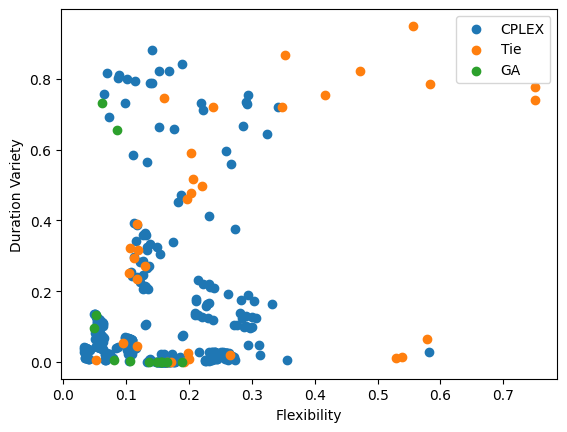

In [27]:
x_ga = [x for x in ga_attributes['f']]
y_ga = [y for y in ga_attributes['dv']]
x_cp = [x for x in cp_attributes['f']]
y_cp = [y for y in cp_attributes['dv']]
x_tied = [x for x in tied_attributes['f']]
y_tied = [y for y in tied_attributes['dv']]
plt.scatter(x_cp, y_cp, label='CPLEX')
plt.scatter(x_tied, y_tied, label='Tie')
plt.scatter(x_ga, y_ga, label='GA')
plt.xlabel('Flexibility')
plt.ylabel('Duration Variety')
plt.legend()
plt.show()

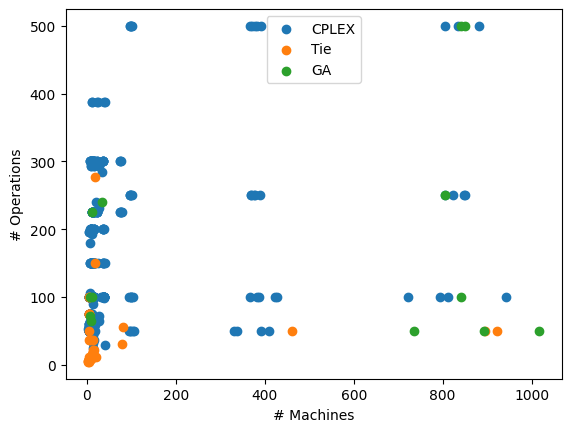

In [28]:
x_ga = [x for x in ga_attributes['m']]
y_ga = [y for y in ga_attributes['o']]
x_cp = [x for x in cp_attributes['m']]
y_cp = [y for y in cp_attributes['o']]
x_tied = [x for x in tied_attributes['m']]
y_tied = [y for y in tied_attributes['o']]
plt.scatter(x_cp, y_cp, label='CPLEX')
plt.scatter(x_tied, y_tied, label='Tie')
plt.scatter(x_ga, y_ga, label='GA')
plt.xlabel('# Machines')
plt.ylabel('# Operations')
plt.legend()
plt.show()

In [29]:
def get_gap_instances(s, value):
    result = []
    for instance in solver[s]:
        gap = calculate_gap(solver[s][instance]['fitness'], best[instance])
        if gap <= value:
            result.append(instance)
    return result

In [30]:
def plot_in_gap(s):
    v1=get_gap_instances(s, 0)
    v2=get_gap_instances(s, 0.05)
    v3=get_gap_instances(s, 0.1)
    v4=get_gap_instances(s, 0.15)
    v5=get_gap_instances(s, 0.2)
    v6=get_gap_instances(s, 1.0)
    v2 = [x for x in v2 if x not in v1]
    v3 = [x for x in v3 if x not in v1 and x not in v2]
    v4 = [x for x in v4 if x not in v1 and x not in v2 and x not in v3]
    v5 = [x for x in v5 if x not in v1 and x not in v2 and x not in v3 and x not in v4]
    all = [v1, v2, v3, v4, v5]
    gaps_label=['0%', '5%', '10%', '15%', '20%']
    attributes = dict()
    for i in range(len(gaps_label)):
        attributes[gaps_label[i]] = {
        'f': [benchmark_data[x]['flexibility'] for x in all[i]],
        'dv': [benchmark_data[x]['duration_variety'] for x in all[i]],
        'o': [benchmark_data[x]['n_operations'] for x in all[i]],
        'm': [benchmark_data[x]['n_machines'] for x in all[i]],
        }
    marker = ['o', '^', 'v', '<', '>']
    for i in range(len(gaps_label)):
        x = [x for x in attributes[gaps_label[i]]['f']]
        y = [y for y in attributes[gaps_label[i]]['dv']]
        plt.scatter(x, y, label=gaps_label[i], marker=marker[i])
    plt.xlabel('Flexibility')
    plt.ylabel('Duration Variety')
    plt.title('Attributes of instances $\leq \delta_{rel}$')
    plt.legend()
    plt.show()
    for i in range(len(gaps_label)):
        x = [x for x in attributes[gaps_label[i]]['m']]
        y = [y for y in attributes[gaps_label[i]]['o']]
        plt.scatter(x, y, label=gaps_label[i], marker=marker[i])
    plt.xlabel('# Machines')
    plt.ylabel('# Operations')
    plt.title('Attributes of instances $\leq \delta_{rel}$')
    plt.legend()
    plt.show()

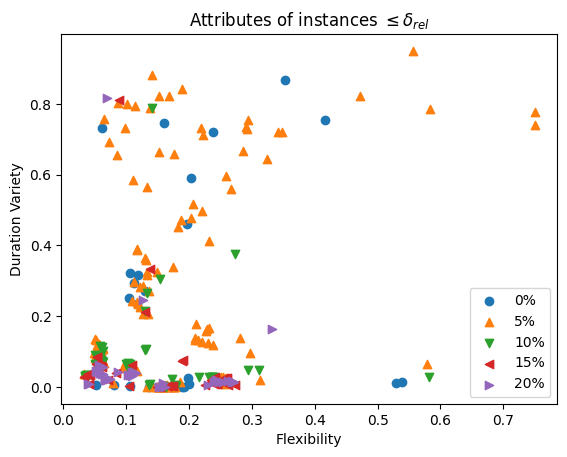

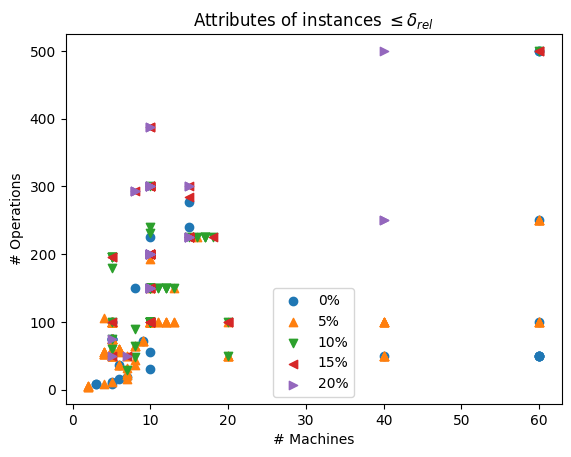

In [31]:
plot_in_gap('ga_best')

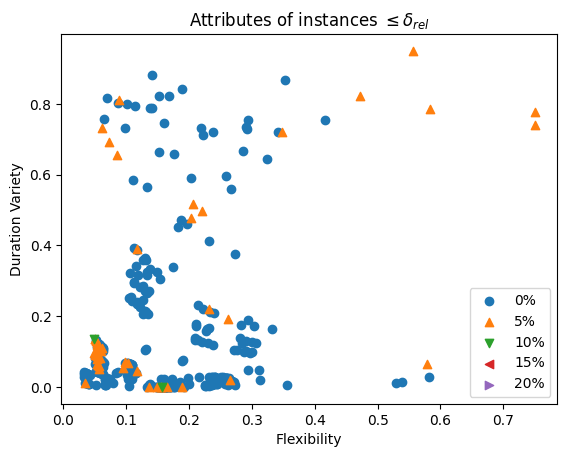

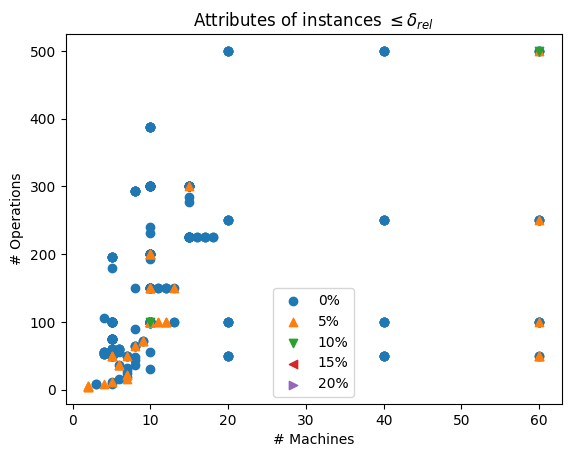

In [32]:
plot_in_gap('cplex_cp')

In [33]:
def get_data(values, labels, attribute):
    x = []
    for label in labels:
        x.append([y for y in values[label][attribute]])
    return x
def plot_in_gap_box(s):
    v1=get_gap_instances(s, 0)
    v2=get_gap_instances(s, 0.05)
    v3=get_gap_instances(s, 0.1)
    v4=get_gap_instances(s, 0.15)
    v5=get_gap_instances(s, 0.2)
    v6=get_gap_instances(s, 1.0)
    v2 = [x for x in v2 if x not in v1]
    v3 = [x for x in v3 if x not in v1 and x not in v2]
    v4 = [x for x in v4 if x not in v1 and x not in v2 and x not in v3]
    v5 = [x for x in v5 if x not in v1 and x not in v2 and x not in v3 and x not in v4]
    all = [v1, v2, v3, v4, v5]
    gaps_label=['0%', '5%', '10%', '15%', '20%']
    gaps_label=['$\leq0.0$', '$\leq0.05$', '$\leq0.1$', '$\leq0.15$', '$\leq0.2$']
    attributes = dict()
    for i in range(len(gaps_label)):
        attributes[gaps_label[i]] = {
        'f': [benchmark_data[x]['flexibility'] for x in all[i]],
        'dv': [benchmark_data[x]['duration_variety'] for x in all[i]],
        'o': [benchmark_data[x]['n_operations'] for x in all[i]],
        'm': [benchmark_data[x]['additional_metrics']['d_average'] for x in all[i]],
        }
    marker = ['o', '^', 'v', '<', '>']
    fig = plt.figure(layout='tight')
    axs = fig.subplots(2,2)
    o = get_data(attributes, gaps_label, 'o')
    axs[0][0].boxplot(o, tick_labels=gaps_label)
    axs[0][0].set_title('$\mathrm{N}$')#'# Operations')
    m = get_data(attributes, gaps_label, 'm')
    axs[0][1].boxplot(m, tick_labels=gaps_label)
    axs[0][1].set_title('$\omega_{avg}$')#'Average Assignments per Operation')
    f = get_data(attributes, gaps_label, 'f')
    axs[1][0].boxplot(f, tick_labels=gaps_label)
    axs[1][0].set_title(r'$\beta$')#'Flexibility')
    dv = get_data(attributes, gaps_label, 'dv')
    axs[1][1].boxplot(dv, tick_labels=gaps_label)
    axs[1][1].set_title('$dv$')#'Duration Variety')
    fig.suptitle('Attributes of instances $\leq \delta_{rel}$')
    plt.legend()
    plt.show()



C:\Users\huda\AppData\Local\Temp\ipykernel_2752\1873204280.py:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


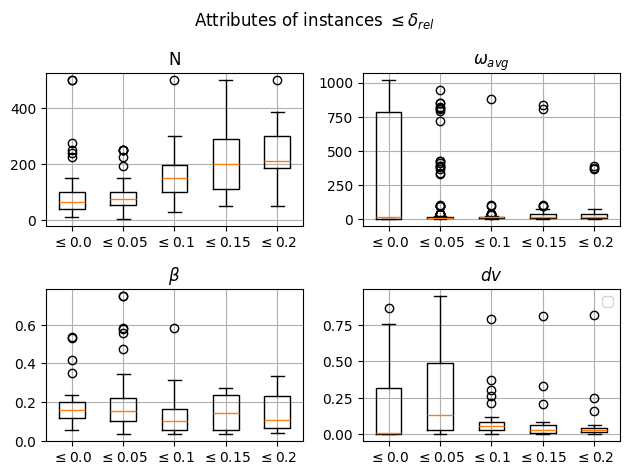

In [34]:
plt.rcParams['axes.grid'] = True
plot_in_gap_box('ga_best')

C:\Users\huda\AppData\Local\Temp\ipykernel_2752\1873204280.py:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


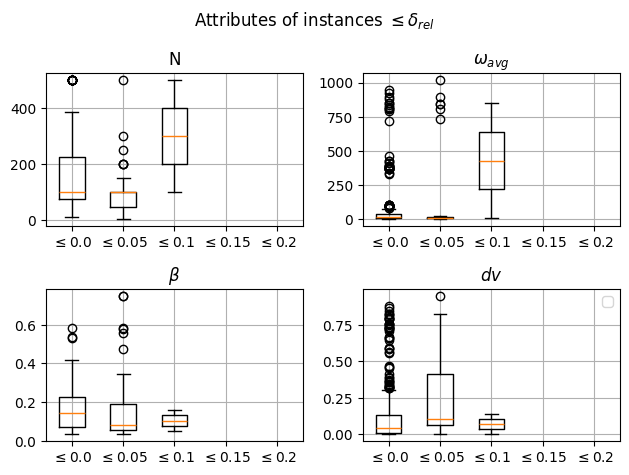

In [35]:
plot_in_gap_box('cplex_cp')